TCS-Stock_analysis

In this project we will performe time series analysis on TCS stock prices using some prediction algorithms

First step is to import the required libraries that are needed to performe analysis

In [1]:
!pip install keras
!pip install TensorFlow


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import keras
from keras.layers import LSTM
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import time

Importing the dataset

In [2]:
df=pd.read_csv("TCS-stock_price_prediction.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [3]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03
mean,1146.182768,1158.538059,1132.825428,1145.521462,1049.456965,3.620596e+06
std,994.070086,1003.010607,984.043404,993.346465,992.062558,3.162368e+06
min,112.000000,116.112503,103.837502,111.550003,86.565590,0.000000e+00
25%,290.693748,295.300010,285.931259,290.275009,219.902748,1.942489e+06
50%,977.450012,995.000000,970.250000,981.337524,820.627839,2.804749e+06
75%,1564.774963,1597.287476,1548.662537,1576.781219,1443.631561,4.297410e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502686,8.806715e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [6]:
df['Date'].min()

'2004-08-27'

In [7]:
df['Date'].max()

'2022-10-24'

In [8]:
# now we will keep date as the index

Text(0.5, 1.0, 'Prices plotting againist of all the parameters present')

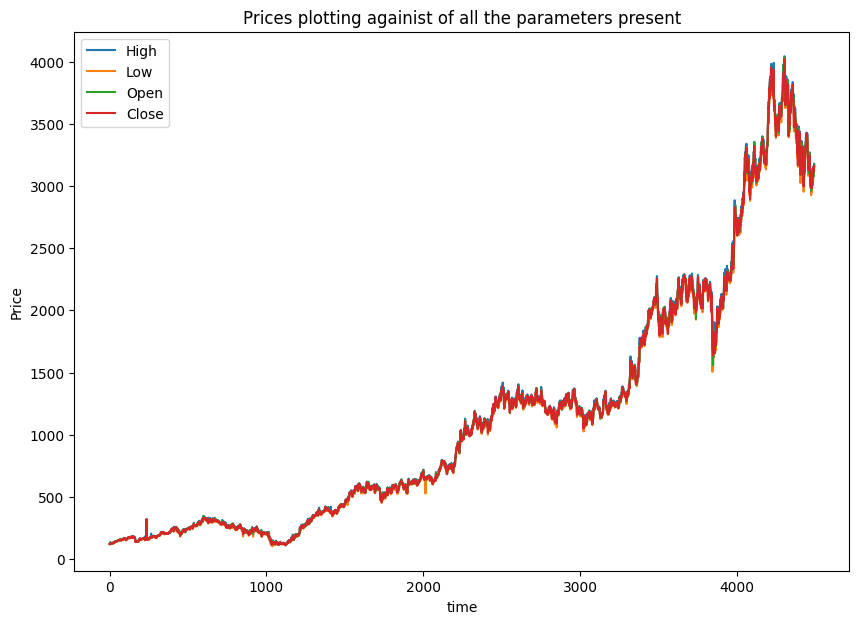

In [9]:
df[['High','Low','Open','Close']].plot(figsize=(10,7))
plt.xlabel('time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title("Prices plotting againist of all the parameters present")


In [10]:
# now we will be plotting for every column

Text(0.5, 1.0, 'Prices plotting againsit of all timeframes for LOW Columns')

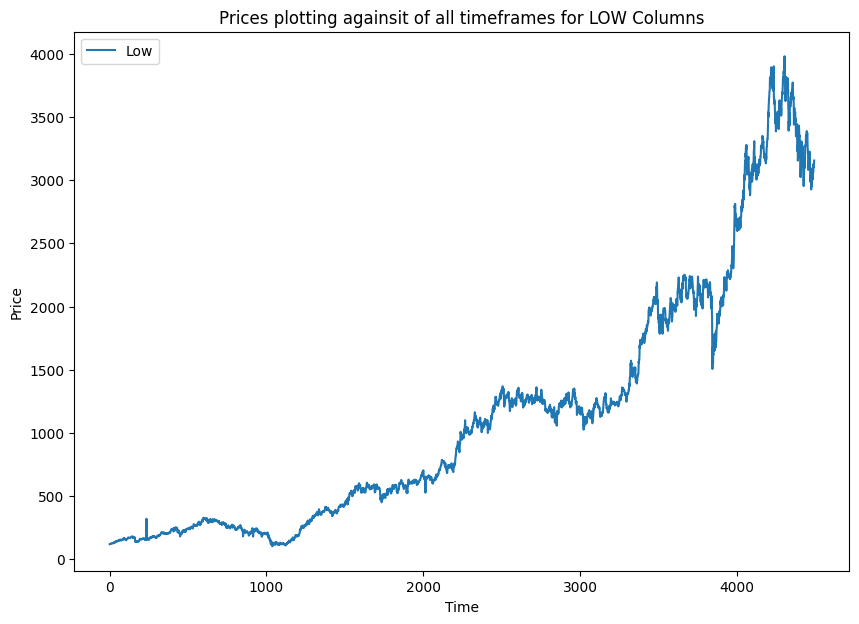

In [11]:
plt.figure(figsize=(10,7))
df['Low'].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title("Prices plotting againsit of all timeframes for LOW Columns")

Text(0.5, 1.0, 'Prices plotting againsit of all timeframes for LOW Columns')

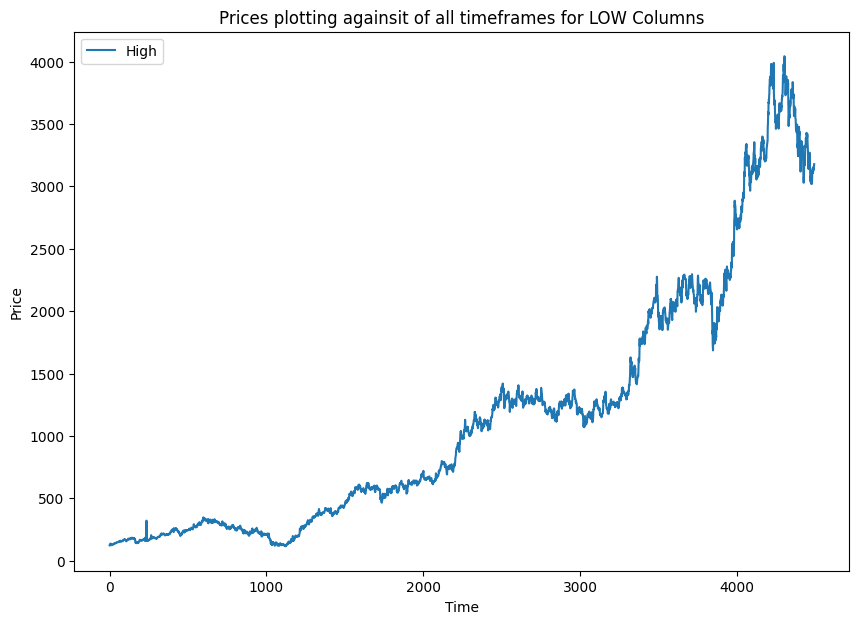

In [12]:
plt.figure(figsize=(10,7))
df['High'].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title("Prices plotting againsit of all timeframes for LOW Columns")

Text(0.5, 1.0, 'Prices plotting againsit of all timeframes for LOW Columns')

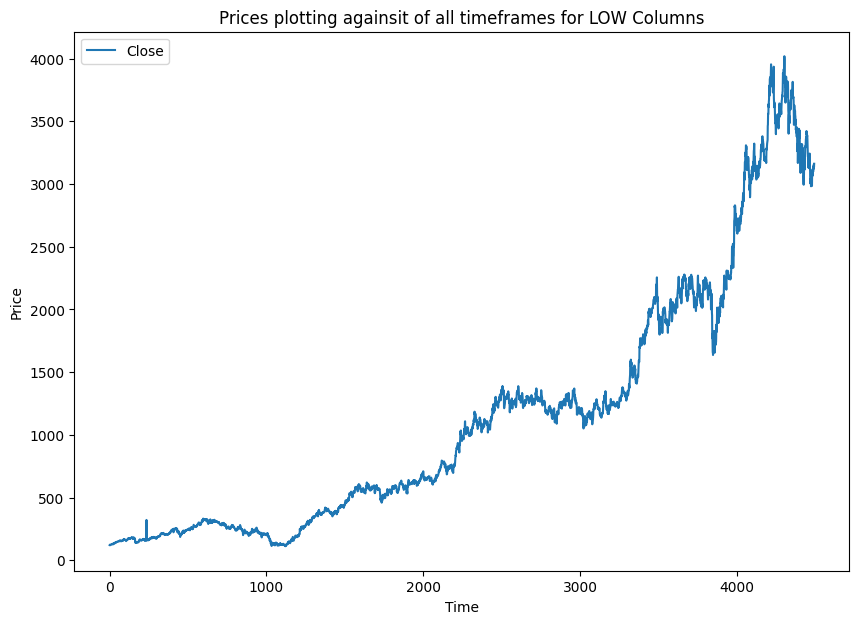

In [13]:
plt.figure(figsize=(10,7))
df['Close'].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
plt.title("Prices plotting againsit of all timeframes for LOW Columns")

 we have observed that all the plots follow the same pattern so we can take any one pattern so we can take any one

In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [15]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
df_row = scalar.fit_transform(df.drop(["Date"],axis=1))

In [16]:
df = pd.DataFrame(df_row,columns = df.drop("Date",axis=1).columns )


In [17]:
#since every column have same properties we will consider any one columns

In [18]:
df = df["High"]
df

0       0.001703
1       0.001945
2       0.001945
3       0.002104
4       0.002410
          ...   
4489    0.773956
4490    0.774885
4491    0.775140
4492    0.775242
4493    0.779724
Name: High, Length: 4494, dtype: float64

In [19]:
df.shape

(4494,)

In [20]:
train_size = int(len(df)*0.70)
test_size = len(df) - train_size
train,test = df[:train_size],df[train_size:train_size+test_size]
print(len(train),len(test))

3145 1349


In [21]:
train,test = list(train),list(test)

In [22]:
#for time series we can take some past days and make future predicion

In [23]:
def dataset(dataset,past_steps = 1):
    x,y = [],[]
    for i in range(len(dataset)-past_steps-1):
        x.append(dataset[i:i+past_steps])
        y.append(dataset[i+past_steps])
    return np.array(x),np.array(y)
        

In [24]:
x_train,y_train = dataset(train,150)
x_test,y_test = dataset(test,150)

In [25]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train,columns=["target"])

In [26]:
df = pd.concat([x_train,y_train],axis=1)

In [27]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,target
0,0.001703,0.001945,0.001945,0.002104,0.002410,0.005446,0.003533,0.003377,0.002289,0.002196,...,0.017148,0.017342,0.017304,0.017383,0.016814,0.016524,0.016206,0.015278,0.014932,0.014996
1,0.001945,0.001945,0.002104,0.002410,0.005446,0.003533,0.003377,0.002289,0.002196,0.001945,...,0.017342,0.017304,0.017383,0.016814,0.016524,0.016206,0.015278,0.014932,0.014996,0.016432
2,0.001945,0.002104,0.002410,0.005446,0.003533,0.003377,0.002289,0.002196,0.001945,0.002757,...,0.017304,0.017383,0.016814,0.016524,0.016206,0.015278,0.014932,0.014996,0.016432,0.016810
3,0.002104,0.002410,0.005446,0.003533,0.003377,0.002289,0.002196,0.001945,0.002757,0.002862,...,0.017383,0.016814,0.016524,0.016206,0.015278,0.014932,0.014996,0.016432,0.016810,0.016804
4,0.002410,0.005446,0.003533,0.003377,0.002289,0.002196,0.001945,0.002757,0.002862,0.002900,...,0.016814,0.016524,0.016206,0.015278,0.014932,0.014996,0.016432,0.016810,0.016804,0.016349


In [28]:
df.dropna(inplace=True)
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
146       0
147       0
148       0
149       0
target    0
Length: 151, dtype: int64

In [29]:
x_train=df.drop(["target"],axis=1)
y_train=df["target"]

In [30]:
X_train = np.array(x_train).reshape(x_train.shape[0],x_train.shape[1],1)
X_test = np.array(x_test).reshape(x_test.shape[0],x_test.shape[1],1) #since we are training with RNN we have to convert into 3d array

In [32]:
from keras.layers import Dense

In [33]:
model = keras.Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 150, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64,verbose=1)


Epoch 1/20
34/34 [==============================] - 28s 485ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 2/20
34/34 [==============================] - 13s 398ms/step - loss: 8.9584e-05 - val_loss: 0.0014
Epoch 3/20
34/34 [==============================] - 14s 415ms/step - loss: 6.1212e-05 - val_loss: 0.0044
Epoch 4/20
34/34 [==============================] - 14s 411ms/step - loss: 5.6146e-05 - val_loss: 0.0051
Epoch 5/20
34/34 [==============================] - 14s 407ms/step - loss: 5.4770e-05 - val_loss: 0.0068
Epoch 6/20
34/34 [==============================] - 14s 411ms/step - loss: 5.3185e-05 - val_loss: 0.0078
Epoch 7/20
34/34 [==============================] - 14s 419ms/step - loss: 5.3470e-05 - val_loss: 0.0083
Epoch 8/20
34/34 [==============================] - 14s 421ms/step - loss: 5.7440e-05 - val_loss: 0.0078
Epoch 9/20
34/34 [==============================] - 14s 414ms/step - loss: 5.2285e-05 - val_loss: 0.0079
Epoch 10/20
34/34 [==============================] - 14s 41

In [37]:
#now we will calculate any errors by means of mean squared error


In [38]:
from sklearn.metrics import mean_squared_error

In [41]:
y_pred = model.predict(x_test)

38/38 [==============================] - 11s 123ms/step


Text(0.5, 1.0, 'Plotting Predicted And Actual Values Together')

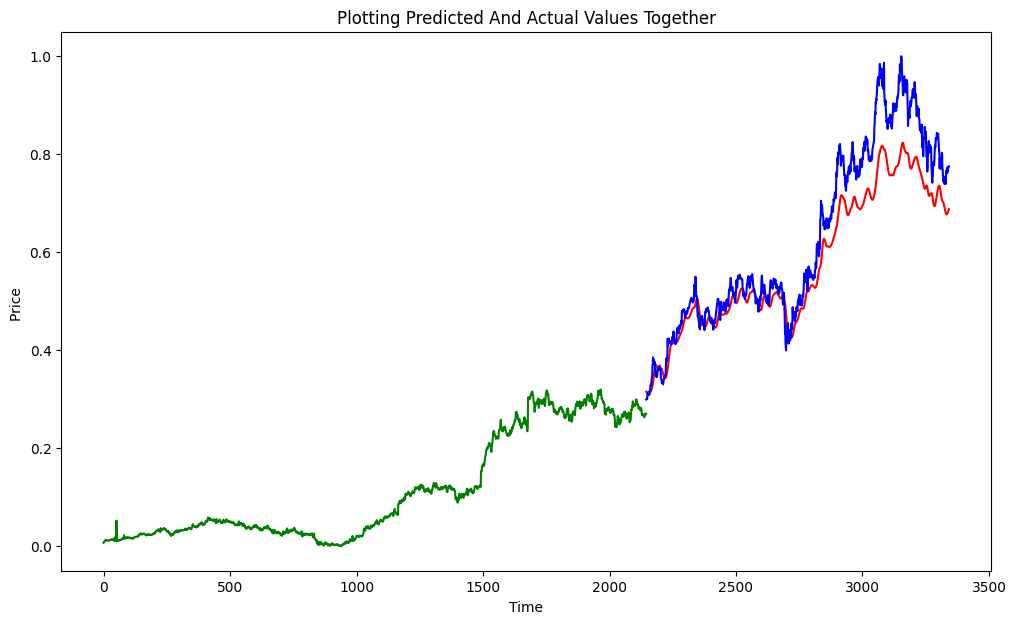

In [54]:
plt.figure(figsize=(12,7))
plt.plot(np.arange(0, len(x_train)), y_train, 'g',label="History")
plt.plot(np.arange(len(x_train), len(x_train) + len(x_test)), y_pred,color='red', label="predictions")
plt.plot(np.arange(len(x_train), len(x_train) + len(x_test)), y_test,color='blue', label="Actual")
plt.xlabel("Time")
plt.ylabel("Price ")
plt.title("Plotting Predicted And Actual Values Together")

This indicates that the data fits well

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred,squared=False)

0.07040767312081184

In general, a lower MSE indicates better performance of the regression model, as it means that the model is able to predict the actual values more accurately.